# **Datos crudo** 

### Importacion Modulos y carga DataFrame

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import f_oneway

In [3]:
vinos = pd.read_csv('data/wines_SPA.csv')

In [4]:
vinos.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Recorremos cada serie dentro del dataframe para identificar los datos hay que limpiar.

# **Limpieza de datos**

Comienza la limpieza de datos. Para ello utilizo los metodos .str.repplace() y fillna() en funcion de si hay que sustituir un nan o un dato que no corresponde.
En caso de caso se aplica una limpieza de datos basada en generalidades como la uva que corresponde a cada region, en el caso de los numericos reemplazando los nan por la media, y en otros de tipo string mas concretos ha sido a base de leer el csv y buscar el dato que corresponde.c(explicar mas y mejor, cada uno en su codigo)

In [5]:
vinos['wine']= vinos['wine'].str.replace("AAA", "Marques de Grinon", case = False)

In [6]:
vinos['wine']= vinos['wine'].str.replace("Tinto", "Teso La Monja", case = False)

In [7]:
vinos['year']= vinos['year'].replace("N.V.", 2010)

In [8]:
vinos['year'].fillna(value = 2010, inplace = True)

In [9]:
vinos['type']= vinos['type'].str.replace("Ribera Del Duero Red", "Tempranillo", case = False)

In [10]:
vinos['type']= vinos['type'].str.replace("Toro Red", "Tinta de toro", case = False)

In [11]:
vinos['type']= vinos['type'].str.replace("Priorat Red", "Carinena", case = False)

In [12]:
vinos['type']= vinos['type'].str.replace("Red", "Monastrell", case = False) 

In [13]:
vinos['type']= vinos['type'].str.replace("Rioja Monastrell", "Monastrell", case = False) 

In [14]:
vinos['type']= vinos['type'].str.replace("Montsant Monastrell", "Monastrell", case = False) 

In [15]:
vinos['type']= vinos['type'].str.replace("Rioja Jumilla", "Tempranillo", case = False)

In [16]:
vinos['type']= vinos['type'].str.replace("Grenache", "Garnacha", case = False)

In [17]:
vinos['type']= vinos['type'].str.replace("Sherry", "Palomino Fino", case = False)

In [18]:
vinos['type']= vinos['type'].str.replace("Rioja white", "Viura", case = False)

In [19]:
vinos['type']= vinos['type'].str.replace("Cava", "Xarello", case = False)

In [20]:
vinos['type']= vinos['type'].str.replace("Sparkling", "Xarello", case = False)

In [21]:
vinos['type'].fillna(value ="Godello", inplace = True)

In [22]:
vinos['region']= vinos['region'].str.replace("Jerez-Xeres-Sherry", "Jerez", case = False)

In [23]:
vinos['region']= vinos['region'].str.replace("Manzanilla", "Jerez", case = False)

In [24]:
vinos['region']= vinos['region'].str.replace("Jerez Palo Cortado", "Jerez", case = False)

In [25]:
vinos['region']= vinos['region'].str.replace("Montilla-Moriles", "Jerez", case = False)

In [26]:
vinos['region']= vinos['region'].str.replace("Carinena", "Priorat", case = False)

In [27]:
vinos['region']= vinos['region'].str.replace("Dehesa del Carrizal", "Pagos", case = False)

In [28]:
vinos['region']= vinos['region'].str.replace("Vino de Espana", "Pagos", case = False)

In [29]:
vinos['body'].fillna(value = 4.1, inplace = True) 

In [30]:
vinos['acidity'].fillna(value = 2.9, inplace = True)  

Una vez limpiados los datos, renombro las columnas a castellano.

In [31]:
vinos.rename(columns = {'winery': 'bodega', 
                        'wine':'vino', 
                        'year': 'anada', 
                        'rating': 'valoracion', 
                        'num_reviews': 'numero_valoraciones', 
                        'region': 'region', 
                        'price': 'precio', 
                        'type': 'uva', 
                        'body': 'cuerpo', 
                        'acidity': 'acidez'   
                        }, inplace = True)

In [32]:
del(vinos['country']) # elimino la columna 'country' ya que es irrelevante al tratarse de un estudio sobre vinos de españa

In [33]:
vinos.head()

,bodega,vino,anada,valoracion,numero_valoraciones,region,precio,uva,cuerpo,acidez
0,Teso La Monja,Teso La Monja,2013,4.9,58,Toro,995.00,Tinta de toro,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Pagos,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Tempranillo,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Tempranillo,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Tempranillo,5.0,3.0


# Graficas

En esta seccion se muestra graficada informacion que contienen los datos una vez tratados.

In [34]:
vinos['uva'].unique()

array(['Tinta de toro', 'Tempranillo', 'Pedro Ximenez', 'Monastrell',
       'Palomino Fino', 'Carinena', 'Viura', 'Garnacha', 'Godello',
       'Xarello', 'Verdejo', 'Syrah', 'Mencia', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

A continuacion procedo a un conteo de  las uvas para poder graficarlas

In [35]:
Tinta_de_toro = vinos['uva'].str.count('Tinta de toro').sum()
Tempranillo = vinos['uva'].str.count('Tempranillo').sum()
Pedro_Ximenez = vinos['uva'].str.count('Pedro Ximenez').sum()
Monastrell = vinos['uva'].str.count('Monastrell').sum()
Palomino_Fino = vinos['uva'].str.count('Palomino Fino').sum()
Carinena = vinos['uva'].str.count('Carinena').sum()
Viura = vinos['uva'].str.count('Viura').sum()
Garnacha = vinos['uva'].str.count('Garnacha').sum()
Godello = vinos['uva'].str.count('Godello').sum()
Xarello = vinos['uva'].str.count('Xarello').sum()
Verdejo = vinos['uva'].str.count('Verdejo').sum()
Syrah = vinos['uva'].str.count('Syrah').sum()
Mencia = vinos['uva'].str.count('Mencia').sum()
Albarino = vinos['uva'].str.count('Albarino').sum()
Chardonnay = vinos['uva'].str.count('Chardonnay').sum()
Cabernet_Sauvignon = vinos['uva'].str.count('Cabernet Sauvignon').sum()
Sauvignon_Blanc = vinos['uva'].str.count('Sauvignon Blanc').sum()

In [36]:
uvas = np.array([Tinta_de_toro, 
        Tempranillo, 
        Pedro_Ximenez, 
        Palomino_Fino, 
        Carinena, 
        Viura, 
        Garnacha, 
        Godello, 
        Xarello, 
        Verdejo, 
        Syrah,
        Mencia, 
        Albarino, 
        Chardonnay, 
        Cabernet_Sauvignon, 
        Sauvignon_Blanc])

uvas


array([ 296, 1698,   35,  274,  674,   92,   35,  545,   38,   27,   15,
        235,  252,   13,   11,    4], dtype=int64)

La primera grafica muestra las 10 uvas que mas aparecen en nuestros datos. La optenemos gracias a la libreria matplotlib con su metodo .bar() para crear una grafica de barras. A este grafico le sigue uno con los porcentajes en grafica circular con el metodo .pie()

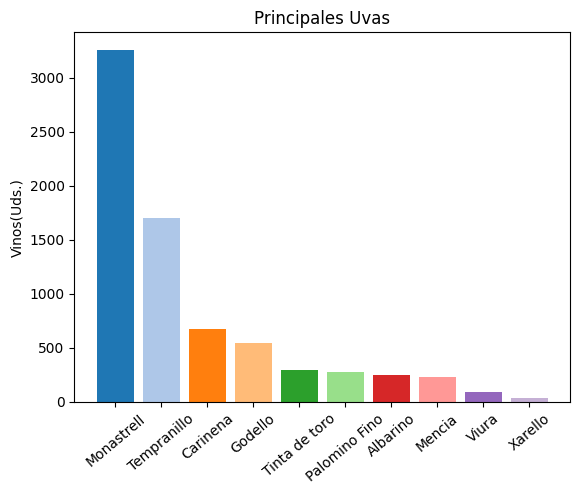

In [37]:
# cantidad de veces que se repiten los valores

counts = vinos['uva'].value_counts()

# grafica de barras

plt.bar(counts.index[0:10], counts.values[0:10], color = plt.cm.tab20.colors)
plt.title('Principales Uvas')
plt.ylabel('Vinos(Uds.)')
plt.xticks(rotation = 40)

# guardo la grafica

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Uvas_principales.png', dpi = 300, bbox_inches = 'tight')

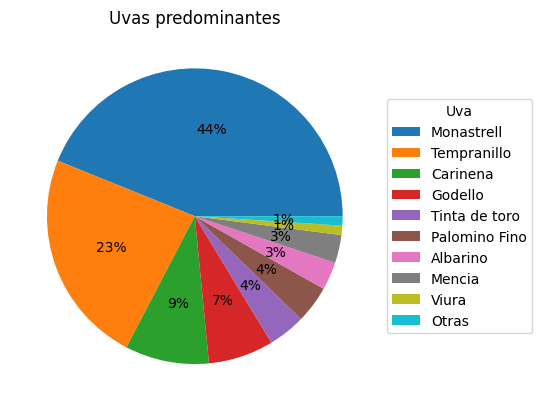

In [38]:
porcentajes = vinos['uva'].value_counts(normalize=True) * 100
porcentajes = porcentajes.round()

# Obtener los 9 mayores porcentajes y agrupar el resto en uno llamado "Otras"

mayores_porcentajes = porcentajes.nlargest(9)
resto = porcentajes.drop(mayores_porcentajes.index).sum()
mayores_porcentajes["Otras"] = resto

# nombres a cada sección

nombres = mayores_porcentajes.index.astype(str)

# grafica circular

plt.title('Uvas predominantes')
plt.pie(mayores_porcentajes.values, labels = ['']*len(nombres), autopct = '%1.0f%%')
plt.legend(nombres, title = 'Uva', loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Uvas_predominantes.png', dpi = 300, bbox_inches = 'tight')

Ahora visualizamos, mediante una grafica de barras horizontal, una grafica de barras horizontal donde se ven 10 las bodegas que mas aparecen en nuestros datos.

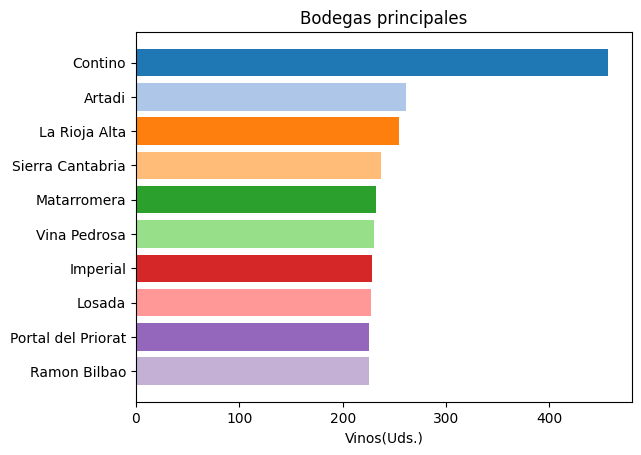

In [39]:
# cantidad de veces que se repiten los valores

counts2 = vinos['bodega'].value_counts()

# grafica de barras

plt.barh(counts2.index[0:10], counts2.values[0:10], color = plt.cm.tab20.colors)
plt.title('Bodegas principales')
plt.xlabel('Vinos(Uds.)')

# Invertir el eje y

plt.gca().invert_yaxis()

# guardo la grafica

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Bodegas_principales.png', dpi = 300, bbox_inches = 'tight')


Esta grafica muestra las D.O's predominantes en españa. Se muestran los porcentajes redondeados.

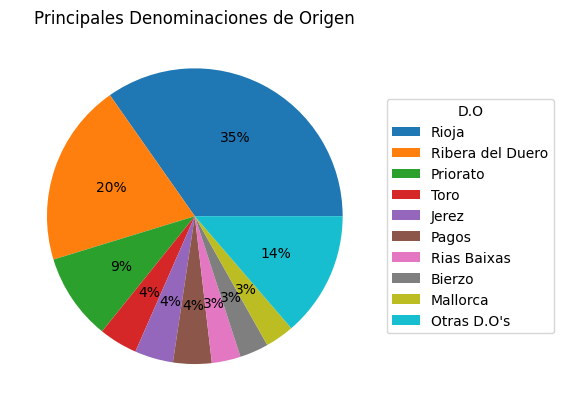

In [40]:
porcentajes = vinos['region'].value_counts(normalize=True) * 100
porcentajes = porcentajes.round()

# Obtener los 9 mayores porcentajes y agrupar el resto en uno llamado "Otras D.O's"

mayores_porcentajes = porcentajes.nlargest(9)
resto = porcentajes.drop(mayores_porcentajes.index).sum()
mayores_porcentajes["Otras D.O's"] = resto

# nombres a cada sección

nombres = mayores_porcentajes.index.astype(str)

# grafica circular

plt.title('Principales Denominaciones de Origen')
plt.pie(mayores_porcentajes.values, labels = ['']*len(nombres), autopct = '%1.0f%%')
plt.legend(nombres, title = 'D.O', loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/D.O.s_predominantes.png', dpi = 300, bbox_inches = 'tight')

In [41]:
vinos

,bodega,vino,anada,valoracion,numero_valoraciones,region,precio,uva,cuerpo,acidez
0,Teso La Monja,Teso La Monja,2013,4.9,58,Toro,995.00,Tinta de toro,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Pagos,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Tempranillo,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Tempranillo,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Tempranillo,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Monastrell,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Carinena,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Monastrell,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Tempranillo,5.0,3.0


# Hipotesis

### Hipotesis 1

Dado que tanto Rioja como Ribera del Duero son las regiones que ocupan el mayor porcentaje de datos, quiero saber si tambien son las que tienen la mayor valoracion promedio.

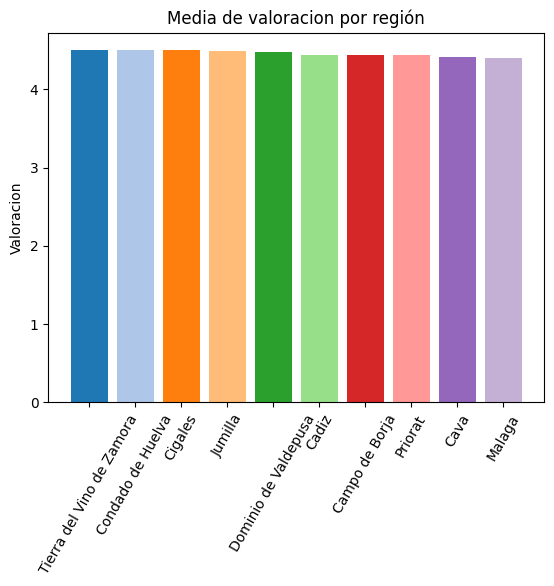

In [42]:
# Calcular la media del rating por región ordenada
region_puntuacion = vinos.groupby("region")["valoracion"].mean().sort_values(ascending = False)

# Crear el gráfico de barras
plt.bar(region_puntuacion.index[0:10], region_puntuacion.values[0:10], color = plt.cm.tab20.colors)

# Configurar los títulos y etiquetas del gráfico
plt.title("Media de valoracion por región")
plt.ylabel("Valoracion")
plt.xticks(rotation = 60)

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Valoracion_por_Region.png', dpi = 300, bbox_inches = 'tight')

# Mostrar el gráfico
plt.show()

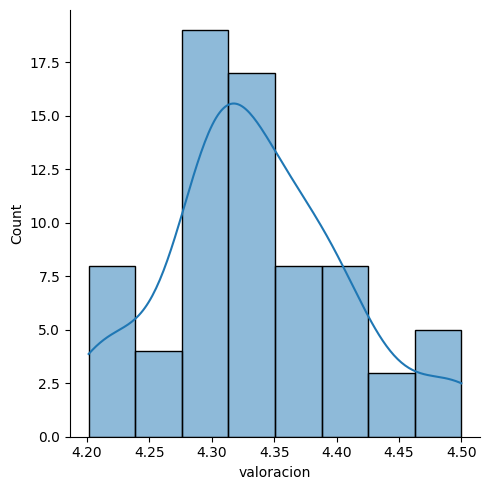

In [43]:
valoracion = vinos.groupby("region")["valoracion"].mean()
sns.displot(valoracion, kde=True);
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Distribución_Media_Valoracion.png', dpi = 300, bbox_inches = 'tight')

In [44]:
#Test de normalidad Kolmogorov-Smirnov

stat, p = stats.kstest(valoracion, 'norm')

print(f'Statistic: {stat:.4f}, p-value: {p}')

Statistic: 1.0000, p-value: 0.0


In [45]:
def hypotesis_check(p_value):
    alpha=0.05
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [46]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [47]:
# Test de normalidad de D'Agostino-Pearson

stat, p = stats.normaltest(valoracion)

print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

Statistic: 1.5124, p-value: 0.4694


In [49]:
alpha=0.05

if p < alpha:
    print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
else:
    print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal


In [50]:
# Test de normalidad de Spearman

stats.spearmanr(vinos["region"], vinos["valoracion"])

SignificanceResult(statistic=0.0018172441291160414, pvalue=0.8749675538051546)

Tras realizar los estudios de la normalidad mediante los test de D'Agostino-Pearson y Kolmogorov-Smirnov, se concluye que la muestra sigue una distribucion normal y por tanto se rechaza la hipotesis nula. Se puede afirmar que haya relacion significativa entre la region y la valoracion.

### Hipotesis 2

La siguiente hipotesis trata de ver la valoracion media basada en las uvas. Estudio si tanto la uva Tempranillo como Monastrell son las que tienen valores mas altos.

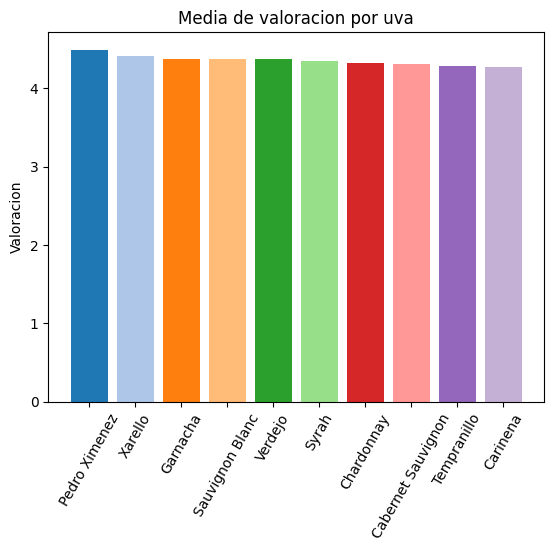

In [51]:
uva_puntuacion = vinos.groupby("uva")["valoracion"].mean().sort_values(ascending = False)

# Crear el gráfico de barras
plt.bar(uva_puntuacion.index[0:10], uva_puntuacion.values[0:10], color = plt.cm.tab20.colors)

# Configurar los títulos y etiquetas del gráfico
plt.title("Media de valoracion por uva")
plt.ylabel("Valoracion")
plt.xticks(rotation = 60)

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Valoracion_por_Uva.png', dpi = 300, bbox_inches = 'tight')

# Mostrar el gráfico
plt.show()


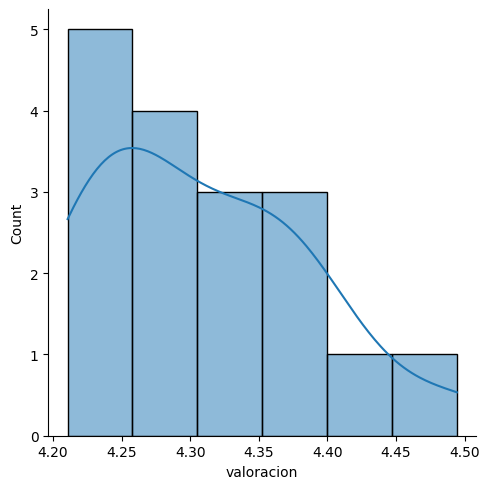

In [52]:
uva_valoracion = vinos.groupby("uva")["valoracion"].mean()

sns.displot(uva_valoracion, kde=True);
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Distribución_Uva_Valoracion.png', dpi = 3000, bbox_inches = 'tight')

In [53]:
# Test de normalidad de D'Agostino-Pearson

stat, p = stats.normaltest(uva_valoracion)

print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

Statistic: 1.9750, p-value: 0.3725


c:\Users\delac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
alpha=0.05

# Decisión en función del p-valor y el nivel de significación
if p < alpha:
    print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
else:
    print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal


Al igual que en la primera hipotesis al  seguir una distribucion normal la valoracion media por uva, podemos rechazar la hipotesis nula, y por lo tanto conluimos que existe relacion (muy debil) entre el tipo de uva y la valoracion, pese a que no son los mas valoradas las que son objeto de estudio.

In [55]:
stats.spearmanr(vinos["uva"], vinos["valoracion"])

SignificanceResult(statistic=0.11504293117666872, pvalue=1.6102087367190592e-23)

### Hipotesis 3

En este caso vamos a estudiar si hay alguna relacion entre el numero de valoracion y la valoracion.

In [90]:
relacion_numeroVa_valoracion = vinos.groupby("valoracion")["numero_valoraciones"].count()
relacion_numeroVa_valoracion

valoracion
4.2    5679
4.3     707
4.4     484
4.5     281
4.6     191
4.7     112
4.8      44
4.9       2
Name: numero_valoraciones, dtype: int64

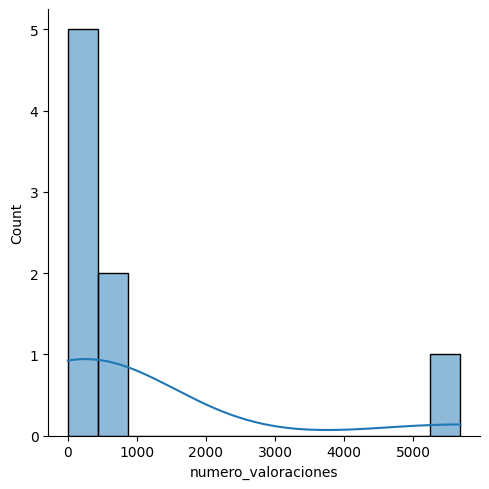

In [92]:
sns.displot(relacion_numeroVa_valoracion, kde=True)
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/NValoraciones_Valoracion.png', dpi = 3000, box_inches = 'tight')

In [99]:
hypotesis_check(p)


Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [58]:
stats.spearmanr(vinos["valoracion"], vinos["numero_valoraciones"])

SignificanceResult(statistic=-0.4160356029257244, pvalue=0.0)

Se observa que no sigue distribucion normal y al realizar el test de correlacion nos indica que no hay relacion. Se acepta la hipotesis nula. No hay relacion entre el numero de valoraciones y la valoracion obtenida.

### Hipotesis 4

En este caso quiero calcular si tanto los vinos de Rioja y Ribera del Duero estan entre la media de vinos mas caros, asi como la posible relacion entre la region y el precio.
Comienzo por estudiar la distribucion media de los precios.

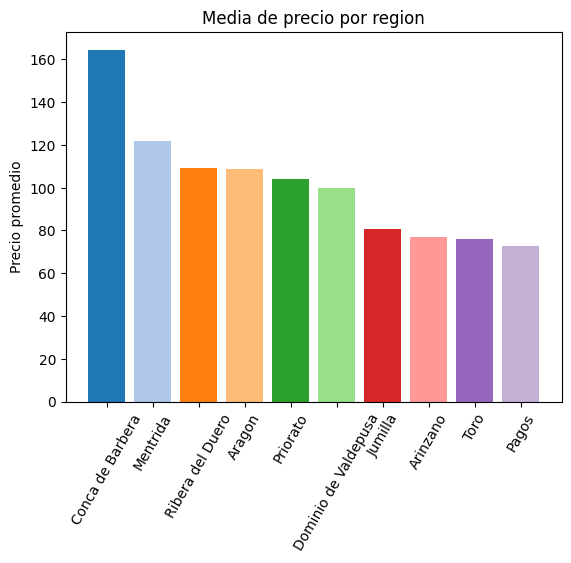

In [59]:
Precios = vinos.groupby("region")["precio"].mean().sort_values(ascending = False)

# Crear el gráfico de barras
plt.bar(Precios.index[0:10], Precios.values[0:10], color = plt.cm.tab20.colors)

# Configurar los títulos y etiquetas del gráfico
plt.title("Media de precio por region")
plt.ylabel("Precio promedio")
plt.xticks(rotation = 60)

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Precio_por_Region.png', dpi = 300, bbox_inches = 'tight')


# Mostrar el gráfico
plt.show()


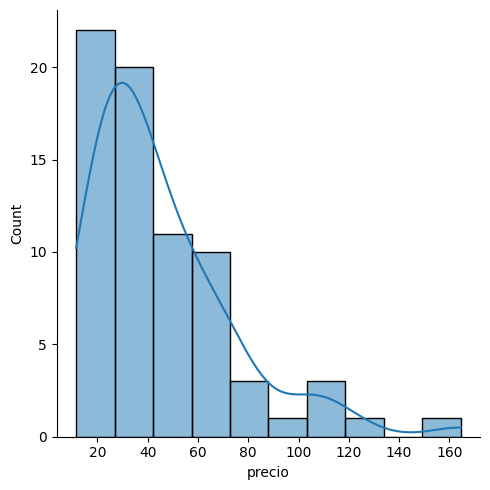

In [60]:
precio = vinos.groupby("region")["precio"].mean()
sns.displot(precio, kde=True);
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Distribución_Precio.png', dpi = 3000, bbox_inches = 'tight')

In [96]:
#Test de normalidad Kolmogorov-Smirnov

stat, p = stats.kstest(precio, 'norm')
print(f'Statistic: {stat:.4f}, p-value: {p}')

Statistic: 1.0000, p-value: 0.0


In [97]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


Se observa que no sigue una distribucion normal el precio medio por region. Se procede a realizar el test de correlacion de Spearman.

In [61]:
stats.spearmanr(vinos["region"], vinos["precio"])

SignificanceResult(statistic=0.17885664591682363, pvalue=5.9463739820838175e-55)

Mediante el cociente de correlacion de Spearman deducimos que no hay correlacion entre el precio y region al obtener un valor cercano a 0. En este caso se acepta la Hipotesis nula al no haber distribucion normal ni correlacion entre las variables. Por lo tanto se afirma que no hay relacion estadistica entre el precio y la region.

### Hipotesis 5

Dado que este estudio esta centrado en las relaciones de los datos en torno a la valoracion, en este caso voy a buscar si hay relacion con el ano del vino.

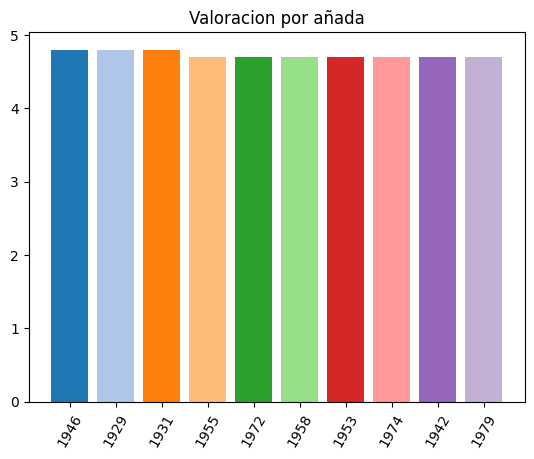

In [62]:
anos = vinos.groupby("anada")["valoracion"].mean().sort_values(ascending = False)

# Crear el gráfico de barras
plt.bar(anos.index[0:10], anos.values[0:10], color = plt.cm.tab20.colors)

# Configurar los títulos y etiquetas del gráfico
plt.title("Valoracion por añada")
plt.xticks(rotation = 60)

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/ValoracionMedia_anada.png', dpi = 300, bbox_inches = 'tight')


# Mostrar el gráfico
plt.show()

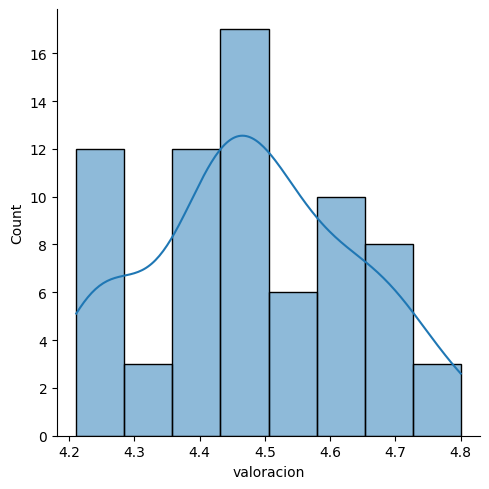

In [63]:
anada = vinos.groupby("anada")["valoracion"].mean()
sns.displot(anada, kde=True);
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Distribución_Anada.png', dpi = 3000, bbox_inches = 'tight')

In [64]:
#Test de normalidad Kolmogorov-Smirnov

stat, p = stats.kstest(anada, 'norm')
print(f'Statistic: {stat:.4f}, p-value: {p}')

Statistic: 1.0000, p-value: 0.0


In [93]:
def hypotesis_check(p_value):
    alpha=0.05
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [66]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [67]:
vinos['anada'] = pd.to_numeric(vinos['anada']) # originalmente es tipo object por lo que se convierte a tipo float para llevar a cabo test

In [68]:
pearsonr(vinos["anada"], vinos["valoracion"])

PearsonRResult(statistic=-0.29338137594108404, pvalue=9.001325160029863e-149)

Nuevamente se acepta la hipotesis nula al no haber normalidad ni correlacion

### Hipotesis 6

Como ultima hipotesis se tratara de ver si la valoracion del vino esta relacionada con la media de acidez y media del cuerpo. Para ello realizo un test ANOVA tomando las medias de la valoracion en base al cuerpo y la acidez.

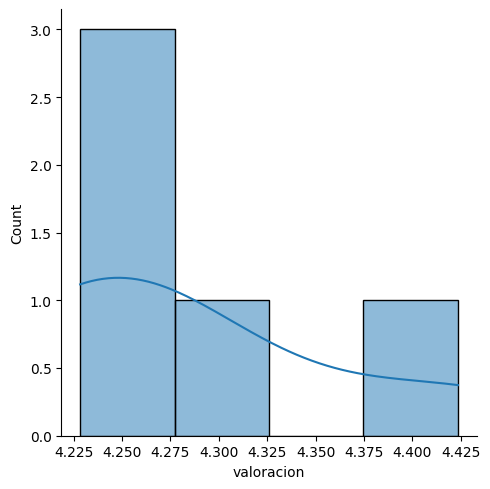

In [69]:
media_cuerpo = vinos.groupby("cuerpo")["valoracion"].mean()
sns.displot(media_cuerpo, kde=True)
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Distribución_Media_Cuerpo.png', dpi = 3000, bbox_inches = 'tight')

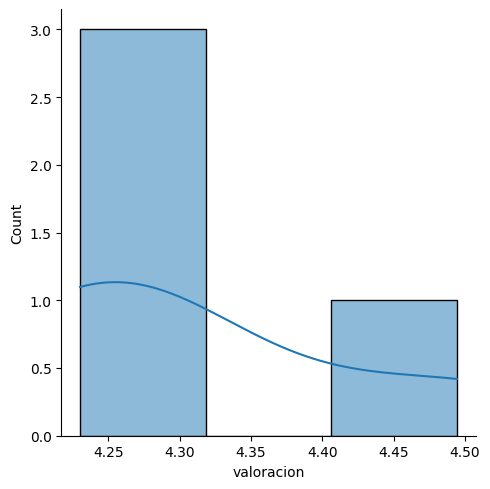

In [70]:
media_acidez = vinos.groupby("acidez")["valoracion"].mean()
sns.displot(media_acidez, kde=True)
plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/Distribución_Media_Acidez.png', dpi = 3000, bbox_inches = 'tight')

In [71]:
# Calculo del estadístico y p-valor

f, p = f_oneway(media_cuerpo, media_acidez)
print("F-value:", f)
print("p-value:", p)

F-value: 0.15066413152376157
p-value: 0.7094358422680285


In [72]:
# Comprobar el valor p frente al nivel de significancia

if p < alpha:
    print("Rechazar la hipótesis nula: hay diferencia en la media de valoracion")
else:
    print("No se puede rechazar la hipótesis nula: no hay una diferencia significativa en la media de valoracion")

No se puede rechazar la hipótesis nula: no hay una diferencia significativa en la media de valoracion


No hay diferencia significativa entre las valoraciones en base a la media de acidez y cuerpo

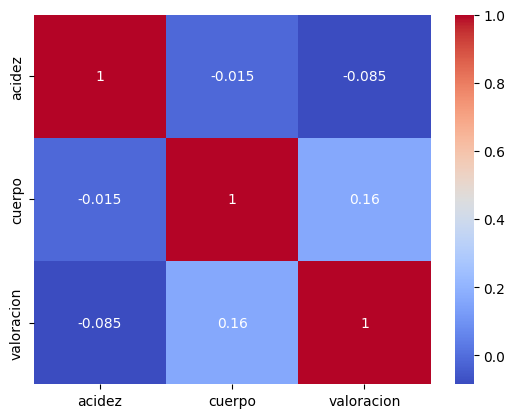

In [73]:
vinos
variables = ['acidez', 'cuerpo', 'valoracion']

# Matriz de correlación para estas columnas

corr_matrix = vinos[variables].corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.savefig('C:/Users/delac/Desktop/Antonio_dela_Cruz_EDA/src/img/MatrizCorrelacion.png', dpi = 3000, bbox_inches = 'tight')

plt.show()